## ESTUDOS DE CASOS EM DATA SCIENCE APLICADO A NEGÓCIOS

---
 
### Tema: Comparação financeira do custo mensal com energia elétrica, com e sem a ultilização de painéis solares.

---


### > Inicialmente, procurei informações relevantes para confecção da análise, logo nos primeiros momentos percebi a dificuldade que era em achar ou talvez tentar estimar esse tipo de informação, o uso de painéis solares aqui no Distrito federal, em sua maioria ainda está em período inicial de avaliação e estudo de viabilidade. 


### > Sabe-se que o uso da energia solar no Brasil corresponde a 1,7% de toda a matriz energética brasileira, sendo a energia solar residencial responsável por 72,6% do montante, seguida por empresas de comércio e serviços (17,99%) e pela energia solar rural (6,25%).

### > Será que conseguimos economizar na conta de luz, após a implementação do sistema de energia solar?

### > Meu objetivo principal, era descobrir em média, quanto conseguimos economizar anualmente com o uso dos painéis solares na região do Distrito Federal-(DF).

In [ ]:
import pandas as pd
import matplotlib.pyplot
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tabela = pd.read_excel("sample_data/base_de_dados.xlsx")
display (tabela)

,ID,COUNTRY,LON,LAT,ANNUAL,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,18811,Brazil,-482490,-160005,4969,3837,4280,3829,4973,5895,6365,6609,7299,5389,4440,3198,3505
1,18812,Brazil,-481490,-160005,4948,3768,4286,3774,4938,5835,6493,6692,7338,5391,4370,3068,3417
2,18813,Brazil,-480490,-160005,4885,3720,4296,3877,4979,5668,6328,6323,7174,5399,4311,3102,3440
3,18814,Brazil,-479490,-160005,4889,3652,4273,3705,4890,5682,6382,6654,7385,5478,4256,2919,3386
4,18815,Brazil,-478490,-160005,4979,3710,4476,3699,5028,5768,6509,6821,7437,5509,4321,3007,3459
5,18816,Brazil,-477490,-160005,5093,3908,4512,3915,5265,5824,6586,6728,7466,5613,4509,3182,3606
6,18817,Brazil,-476490,-160005,5164,4138,4652,3926,5242,5929,6556,6793,7509,5653,4614,3213,3738
7,18818,Brazil,-475490,-160005,5130,4334,4757,3971,5117,5886,6177,6660,7155,5653,4735,3285,3828
8,18819,Brazil,-474490,-160005,5180,4305,4721,3982,5101,5873,6271,6751,7300,5829,4789,3321,3916
9,18820,Brazil,-473490,-160005,5250,4279,4786,4031,5218,5937,6292,6816,7501,5861,4848,3417,4015


In [ ]:
# Dados de mêses com índice de 5 a 17

dias_mes = 30

keys = tabela.keys()

meses = [keys[mes] for mes in range(5,17)]
lista_media = []

for mes in meses:
  media_mensal = tabela[mes].mean()*dias_mes/1000 # Passando a unidade para KWh/m^2
  lista_media.append(media_mensal)

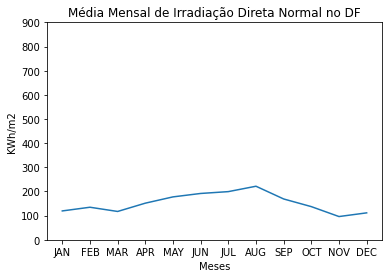

In [ ]:
plt.xlabel('Meses')
plt.ylabel('KWh/m2')
plt.ylim(0,900)
plt.plot(meses,lista_media)
plt.title('Média Mensal de Irradiação Direta Normal no DF')
plt.show()

In [ ]:
# Foi adotado um total de 10m^2 de paineis solares (Correspondente a aproximadamente 6 paineis de 1 x 1,65)
# A eficiência adotada foi de 22%

area = 10
eficiencia = 0.22

array_media = np.array(lista_media)
lista_energia_convertida = array_media* 10 * 0.22

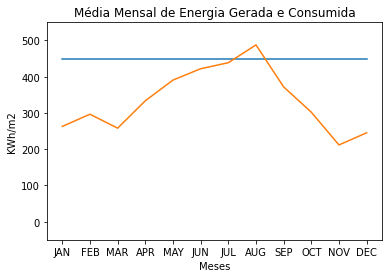

In [ ]:
# Para o problema, foi adotado o consumo médio de uma casa grande que gira em torno de 450 KWh/Mês

consumo_medio = np.array([450]* 12)

plt.xlabel('Meses')
plt.ylabel('KWh/m2')
plt.ylim(-50,550)
plt.plot(meses,consumo_medio)
plt.plot(meses,lista_energia_convertida)

plt.title('Média Mensal de Energia Gerada e Consumida')
plt.show()

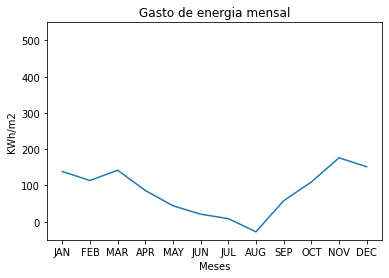

In [ ]:
# Utilizando como referência o preço do kWh a R$ 0,74
# foi calculada quantidade de dinehiro economizado a cada mês
# Com esses dados podemos mostrar no gráfico do que será pago em cada mês afim de complementar a o gasto de energia elétrica médio

preco_kwh = 0.74
energia_restante = consumo_medio - lista_energia_convertida

preco_pago = energia_restante * preco_kwh

plt.xlabel('Meses')
plt.ylabel('KWh/m2')
plt.ylim(-50,550)
plt.title('Gasto de energia mensal')
plt.plot(meses,preco_pago)

In [ ]:
# Por fim é possível realizar o somatório de economia nos mêses para mostrar o total economizado em um ano

preco_medio       = consumo_medio            *preco_kwh
preco_economizado = lista_energia_convertida *preco_kwh

total_medio       = preco_medio.sum()
total_economizado = preco_economizado.sum()
total_pago        = preco_pago.sum()

print("total_medio:        ",total_medio) 
print("total_economizado : ",total_economizado) 
print("total_pago:         ",total_pago) 

total_medio:         3996.0
total_economizado :  2975.67468
total_pago:          1020.3253200000001


### > Hipoteticamente vemos que em média foi economizado mais de 70% no valor gasto com energia elétrica em uma casa familiar convencional, após a implementação do sistema de energia solar.

### > Conclui-se que o uso de painéis solares pode reduzir consideravelmente o valor gasto com a energia elétrica, porem alguns fatores devem ser levados em consideração antes de fazer um planejamento de implementação, tais como, o valor inicial investido para adquirir tais condições de economia, a infraestrutura do edifício e as condições climáticas da região.

## Referências:

http://labren.ccst.inpe.br/atlas2_tables/DF_dir.html

https://www.portalsolar.com.br/energia-solar-no-brasil.html

https://colab.research.google.com/drive/1gFNPF2X4hvo12NHVIOjAb8RrrAPPydLn#scrollTo=MpWtcelBQx-A